In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
from sklearn.preprocessing import LabelEncoder
lE = LabelEncoder()
df['Geography'] = lE.fit_transform(df['Geography'])
df['Gender'] = lE.fit_transform(df['Gender'])

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df_pros = df.drop(df.columns[[0,1,2]],axis=1)

In [10]:
df_pros

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [13]:
df_pros.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
model = scaler.fit(df_pros)
dfNew = model.transform(df_pros)

In [23]:
dfNew = pd.DataFrame(dfNew)

In [24]:
df_pros.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [25]:
dfNew.columns = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited']

In [26]:
dfNew

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.901886,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.505775
9996,-1.391939,-0.901886,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.505775
9997,0.604988,-0.901886,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.977165
9998,1.256835,0.306591,0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.977165


In [34]:
x = dfNew.drop(columns=["Exited"])  # Features
y = lE.fit_transform(dfNew["Exited"])  # Target

In [36]:
from sklearn.model_selection import train_test_split
x_train_temp, x_test, y_train_temp, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_temp, y_train_temp, test_size=0.15, random_state=42)

In [40]:
hidden_layer_configs = [
    (1, [128], 'relu'),
    (2, [128, 64], 'relu'),
    (3, [128, 64, 32], 'relu')
]
epochs_list = [10, 20, 30]
learning_rates = [0.1, 0.01, 0.001]

In [49]:
results = []

for hidden_layers, units, activation in hidden_layer_configs:
    for epochs in epochs_list:
        for lr in learning_rates:
            # Build the neural network model
            model = keras.Sequential([
                layers.Input(shape=(x_train.shape[1],)),
            ])
            
            for _ in range(hidden_layers):
                model.add(layers.Dense(units=units[_], activation=activation))
            
            model.add(layers.Dense(1, activation='sigmoid'))

            # Compile the model
            model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

            # Train the model
            history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=32, verbose=1)
            
            # Evaluate on the validation set
            y_val_pred = model.predict(x_val)
            y_val_pred_classes = np.round(y_val_pred)
            
            accuracy = accuracy_score(y_val, y_val_pred_classes)
            precision = precision_score(y_val, y_val_pred_classes)
            recall = recall_score(y_val, y_val_pred_classes)
            
            results.append((hidden_layers, units, activation, epochs, lr, accuracy, precision, recall))

# Display Results
results_df = pd.DataFrame(results, columns=['Hidden Layers', 'Units', 'Activation', 'Epochs', 'Learning Rate', 'Accuracy', 'Precision', 'Recall'])
print(results_df)


Epoch 1/10
226/226 [==============================] - 1s 1ms/step - loss: 0.4665 - accuracy: 0.8147 - val_loss: 0.4569 - val_accuracy: 0.8063
Epoch 2/10
226/226 [==============================] - 0s 1ms/step - loss: 0.4032 - accuracy: 0.8317 - val_loss: 0.4270 - val_accuracy: 0.8251
Epoch 3/10
226/226 [==============================] - 0s 1ms/step - loss: 0.3889 - accuracy: 0.8407 - val_loss: 0.4011 - val_accuracy: 0.8376
Epoch 4/10
226/226 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8403 - val_loss: 0.3853 - val_accuracy: 0.8494
Epoch 5/10
226/226 [==============================] - 0s 1ms/step - loss: 0.3792 - accuracy: 0.8454 - val_loss: 0.4000 - val_accuracy: 0.8478
Epoch 6/10
226/226 [==============================] - 0s 1ms/step - loss: 0.3872 - accuracy: 0.8446 - val_loss: 0.3787 - val_accuracy: 0.8486
Epoch 7/10
226/226 [==============================] - 0s 1ms/step - loss: 0.3814 - accuracy: 0.8426 - val_loss: 0.3826 - val_accuracy: 0.8431
Epoch 

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


226/226 [==============================] - 1s 1ms/step - loss: 0.3949 - accuracy: 0.8345 - val_loss: 0.3799 - val_accuracy: 0.8416
Epoch 2/10
226/226 [==============================] - 0s 1ms/step - loss: 0.3642 - accuracy: 0.8507 - val_loss: 0.3747 - val_accuracy: 0.8549
Epoch 3/10
226/226 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8520 - val_loss: 0.3742 - val_accuracy: 0.8455
Epoch 4/10
226/226 [==============================] - 0s 1ms/step - loss: 0.3520 - accuracy: 0.8538 - val_loss: 0.3653 - val_accuracy: 0.8486
Epoch 5/10
226/226 [==============================] - 0s 1ms/step - loss: 0.3458 - accuracy: 0.8573 - val_loss: 0.3622 - val_accuracy: 0.8573
Epoch 6/10
226/226 [==============================] - 0s 1ms/step - loss: 0.3410 - accuracy: 0.8603 - val_loss: 0.3680 - val_accuracy: 0.8541
Epoch 7/10
226/226 [==============================] - 0s 1ms/step - loss: 0.3419 - accuracy: 0.8581 - val_loss: 0.3625 - val_accuracy: 0.8549
Epoch 8/10
226/22

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


226/226 [==============================] - 1s 2ms/step - loss: 0.4115 - accuracy: 0.8260 - val_loss: 0.3735 - val_accuracy: 0.8494
Epoch 2/20
226/226 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8531 - val_loss: 0.3595 - val_accuracy: 0.8557
Epoch 3/20
226/226 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.8540 - val_loss: 0.3798 - val_accuracy: 0.8431
Epoch 4/20
226/226 [==============================] - 0s 1ms/step - loss: 0.3476 - accuracy: 0.8543 - val_loss: 0.3638 - val_accuracy: 0.8596
Epoch 5/20
226/226 [==============================] - 0s 1ms/step - loss: 0.3447 - accuracy: 0.8559 - val_loss: 0.3633 - val_accuracy: 0.8612
Epoch 6/20
226/226 [==============================] - 0s 1ms/step - loss: 0.3394 - accuracy: 0.8597 - val_loss: 0.3643 - val_accuracy: 0.8596
Epoch 7/20
226/226 [==============================] - 0s 1ms/step - loss: 0.3383 - accuracy: 0.8591 - val_loss: 0.3654 - val_accuracy: 0.8596
Epoch 8/20
226/22

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


226/226 [==============================] - 1s 1ms/step - loss: 0.3948 - accuracy: 0.8401 - val_loss: 0.3828 - val_accuracy: 0.8510
Epoch 2/30
226/226 [==============================] - 0s 1ms/step - loss: 0.3632 - accuracy: 0.8520 - val_loss: 0.3608 - val_accuracy: 0.8557
Epoch 3/30
226/226 [==============================] - 0s 1ms/step - loss: 0.3526 - accuracy: 0.8556 - val_loss: 0.3707 - val_accuracy: 0.8557
Epoch 4/30
226/226 [==============================] - 0s 1ms/step - loss: 0.3476 - accuracy: 0.8544 - val_loss: 0.3731 - val_accuracy: 0.8510
Epoch 5/30
226/226 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.8556 - val_loss: 0.3622 - val_accuracy: 0.8557
Epoch 6/30
226/226 [==============================] - 0s 1ms/step - loss: 0.3366 - accuracy: 0.8605 - val_loss: 0.3579 - val_accuracy: 0.8549
Epoch 7/30
226/226 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.8583 - val_loss: 0.3785 - val_accuracy: 0.8447
Epoch 8/30
226/22

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


226/226 [==============================] - 1s 2ms/step - loss: 0.4043 - accuracy: 0.8318 - val_loss: 0.3830 - val_accuracy: 0.8486
Epoch 2/10
226/226 [==============================] - 0s 1ms/step - loss: 0.3632 - accuracy: 0.8502 - val_loss: 0.3871 - val_accuracy: 0.8447
Epoch 3/10
226/226 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.8548 - val_loss: 0.3699 - val_accuracy: 0.8463
Epoch 4/10
226/226 [==============================] - 0s 1ms/step - loss: 0.3473 - accuracy: 0.8573 - val_loss: 0.3709 - val_accuracy: 0.8557
Epoch 5/10
226/226 [==============================] - 0s 1ms/step - loss: 0.3433 - accuracy: 0.8584 - val_loss: 0.3904 - val_accuracy: 0.8502
Epoch 6/10
226/226 [==============================] - 0s 1ms/step - loss: 0.3421 - accuracy: 0.8585 - val_loss: 0.3629 - val_accuracy: 0.8604
Epoch 7/10
226/226 [==============================] - 0s 1ms/step - loss: 0.3358 - accuracy: 0.8598 - val_loss: 0.3655 - val_accuracy: 0.8580
Epoch 8/10
226/22

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


226/226 [==============================] - 1s 2ms/step - loss: 0.4006 - accuracy: 0.8343 - val_loss: 0.3758 - val_accuracy: 0.8596
Epoch 2/20
226/226 [==============================] - 0s 1ms/step - loss: 0.3622 - accuracy: 0.8509 - val_loss: 0.3978 - val_accuracy: 0.8533
Epoch 3/20
226/226 [==============================] - 0s 1ms/step - loss: 0.3537 - accuracy: 0.8558 - val_loss: 0.3647 - val_accuracy: 0.8612
Epoch 4/20
226/226 [==============================] - 0s 1ms/step - loss: 0.3471 - accuracy: 0.8556 - val_loss: 0.3746 - val_accuracy: 0.8416
Epoch 5/20
226/226 [==============================] - 0s 1ms/step - loss: 0.3439 - accuracy: 0.8591 - val_loss: 0.3633 - val_accuracy: 0.8635
Epoch 6/20
226/226 [==============================] - 0s 1ms/step - loss: 0.3408 - accuracy: 0.8610 - val_loss: 0.3708 - val_accuracy: 0.8565
Epoch 7/20
226/226 [==============================] - 0s 1ms/step - loss: 0.3391 - accuracy: 0.8592 - val_loss: 0.3683 - val_accuracy: 0.8518
Epoch 8/20
226/22

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


226/226 [==============================] - 1s 2ms/step - loss: 0.4025 - accuracy: 0.8314 - val_loss: 0.4250 - val_accuracy: 0.8235
Epoch 2/30
226/226 [==============================] - 0s 1ms/step - loss: 0.3639 - accuracy: 0.8523 - val_loss: 0.3713 - val_accuracy: 0.8573
Epoch 3/30
226/226 [==============================] - 0s 1ms/step - loss: 0.3576 - accuracy: 0.8526 - val_loss: 0.3663 - val_accuracy: 0.8580
Epoch 4/30
226/226 [==============================] - 0s 1ms/step - loss: 0.3494 - accuracy: 0.8565 - val_loss: 0.3734 - val_accuracy: 0.8573
Epoch 5/30
226/226 [==============================] - 0s 1ms/step - loss: 0.3465 - accuracy: 0.8583 - val_loss: 0.3698 - val_accuracy: 0.8541
Epoch 6/30
226/226 [==============================] - 0s 1ms/step - loss: 0.3414 - accuracy: 0.8572 - val_loss: 0.3770 - val_accuracy: 0.8580
Epoch 7/30
226/226 [==============================] - 0s 1ms/step - loss: 0.3380 - accuracy: 0.8598 - val_loss: 0.3654 - val_accuracy: 0.8541
Epoch 8/30
226/22

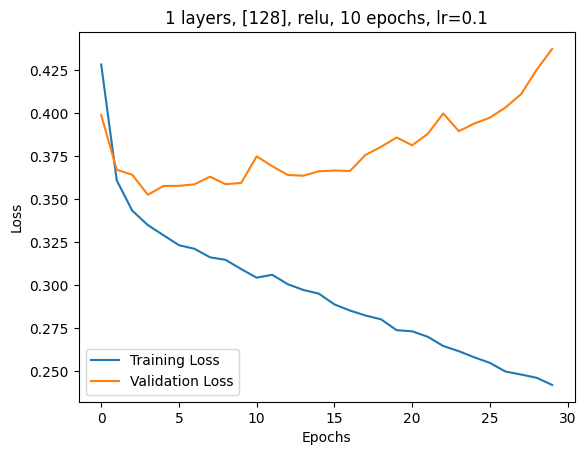

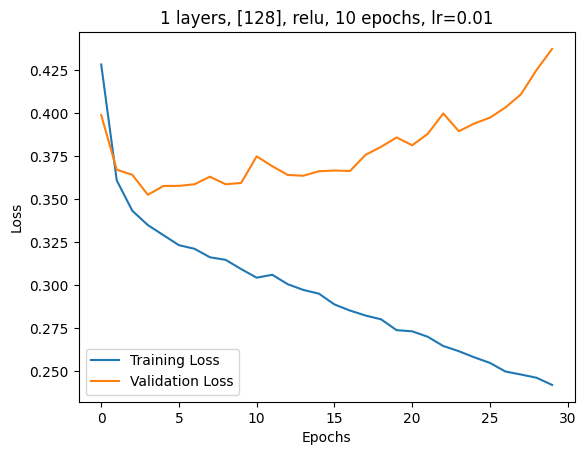

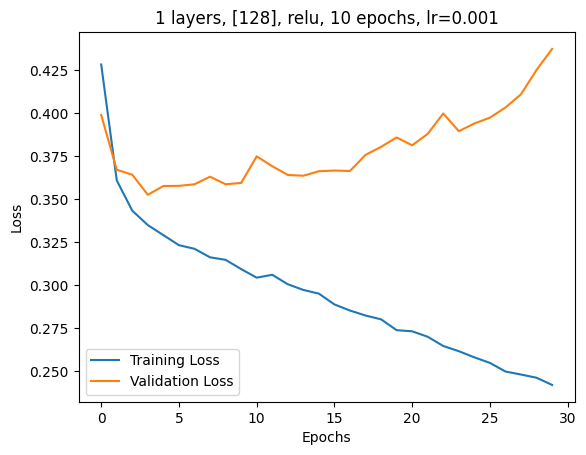

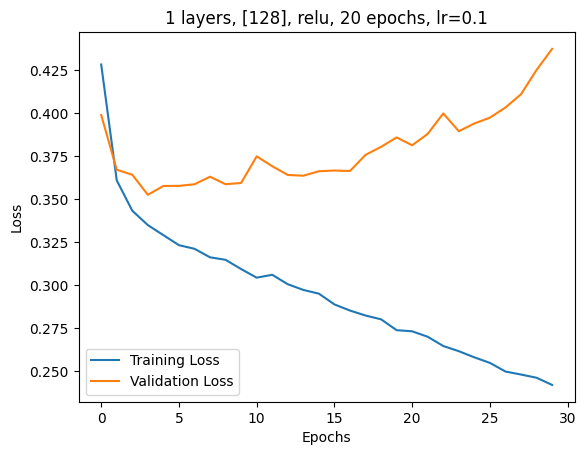

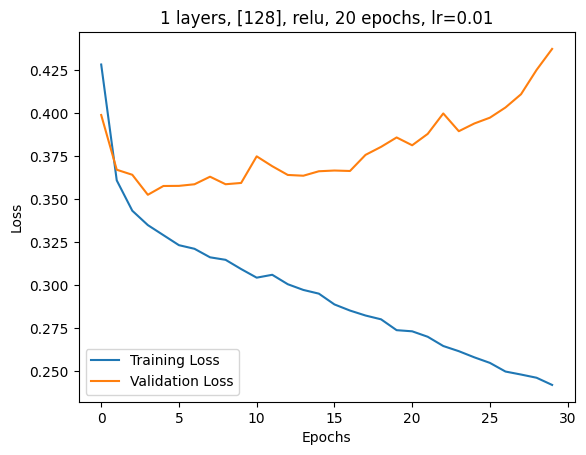

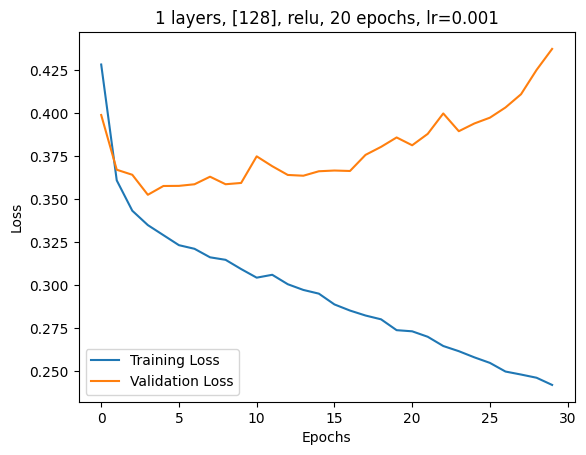

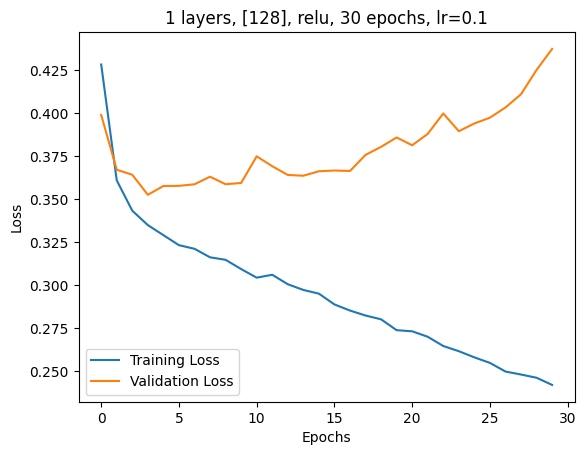

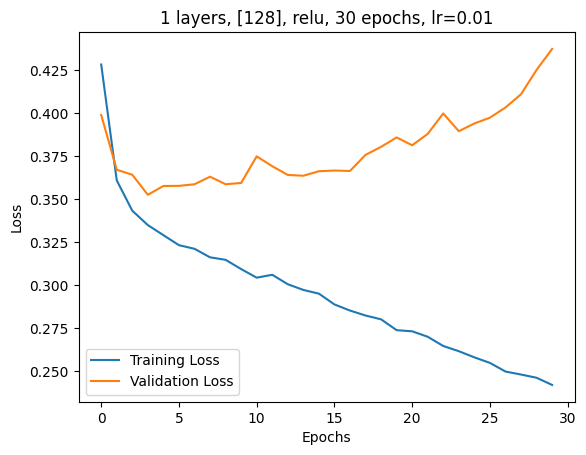

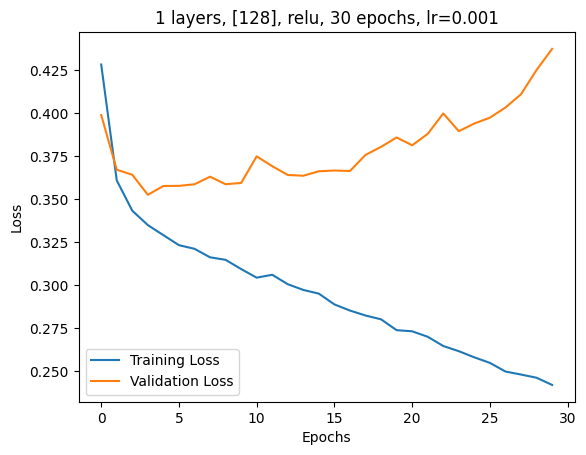

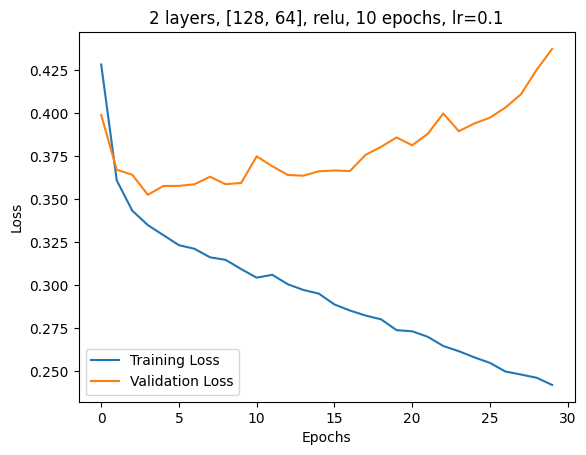

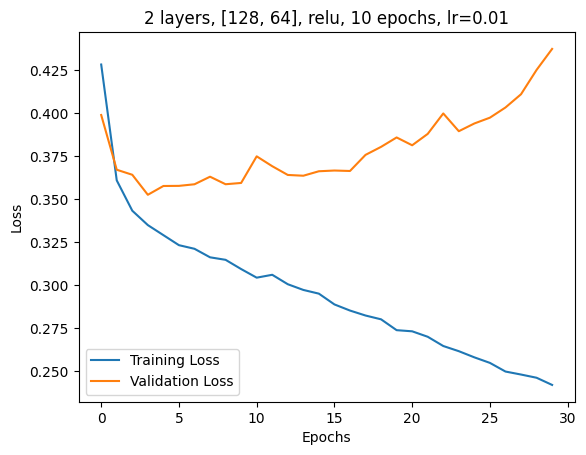

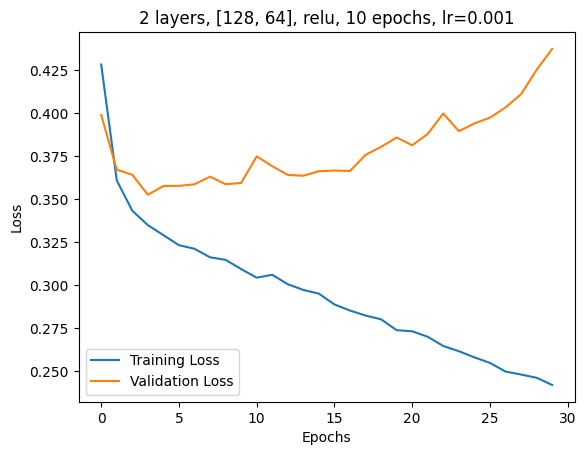

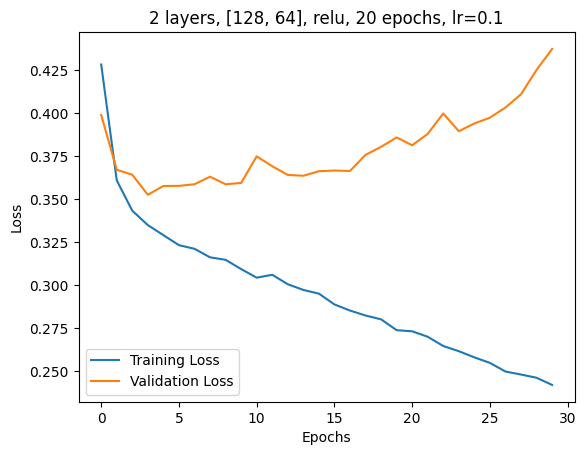

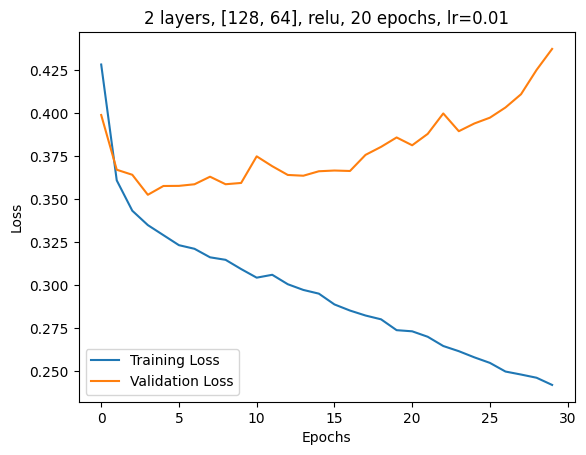

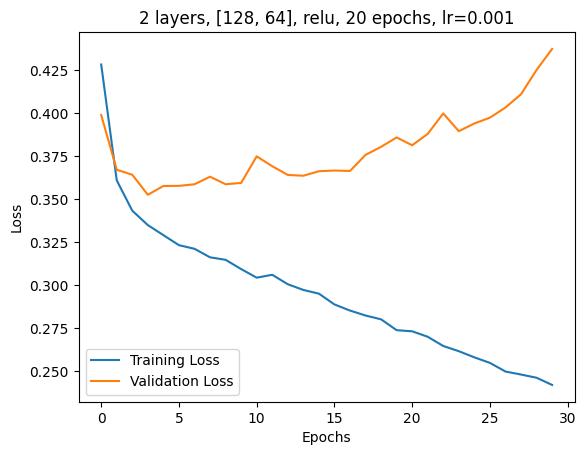

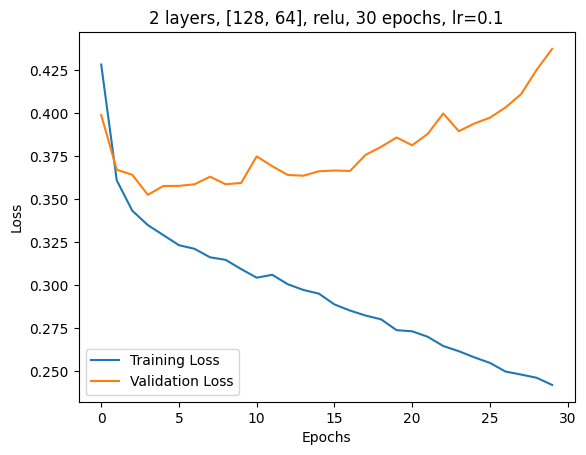

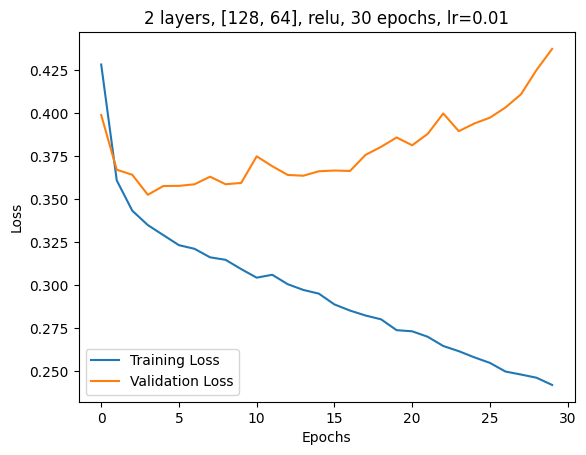

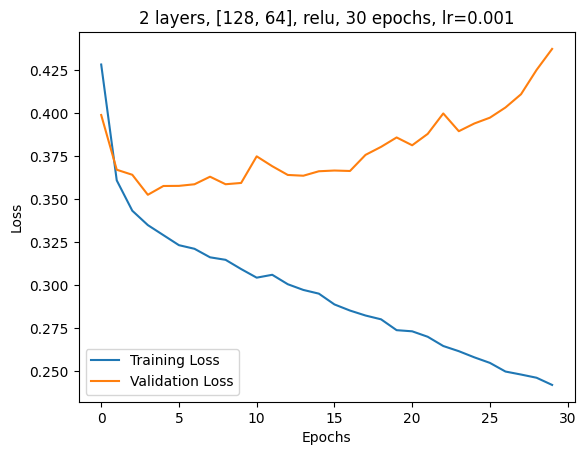

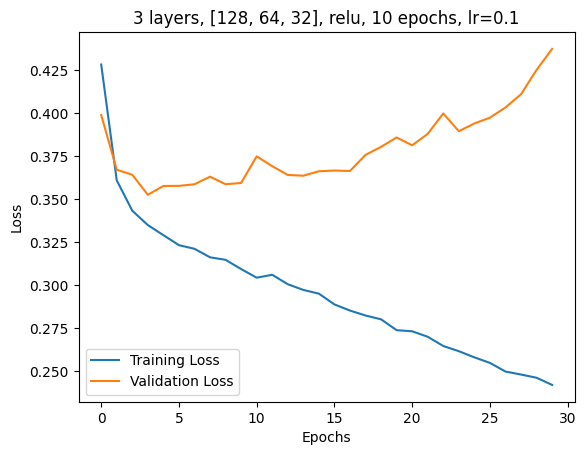

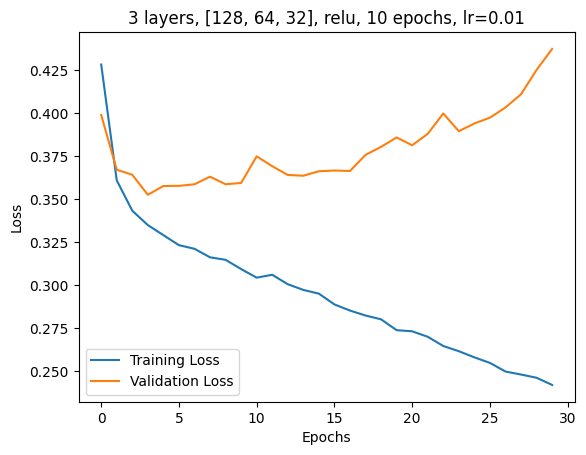

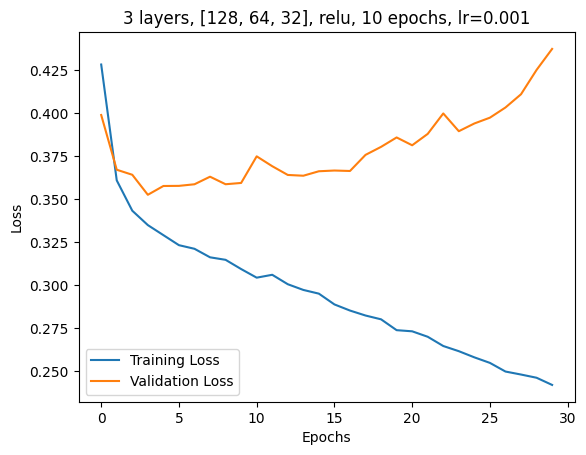

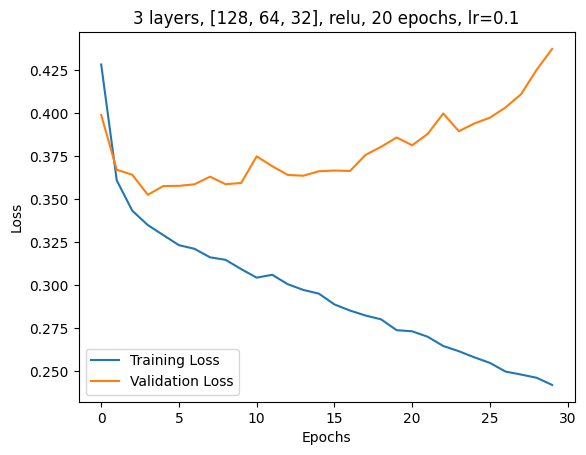

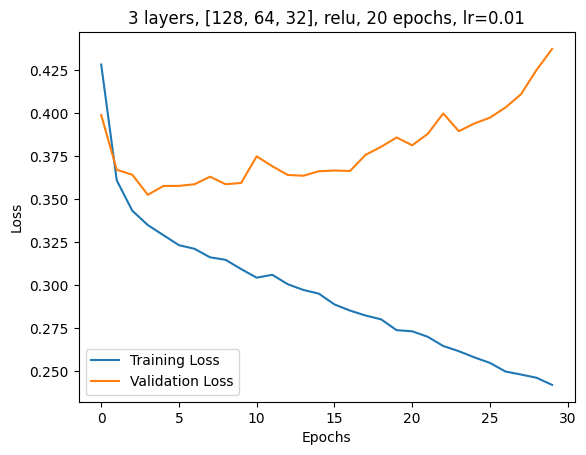

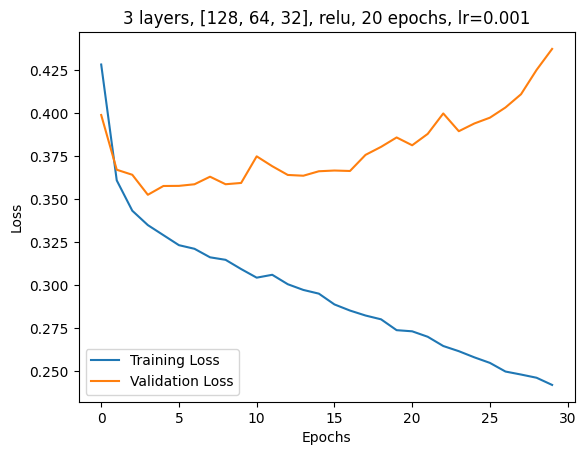

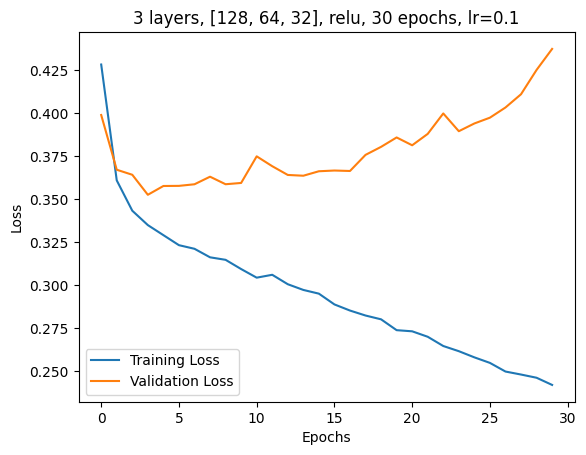

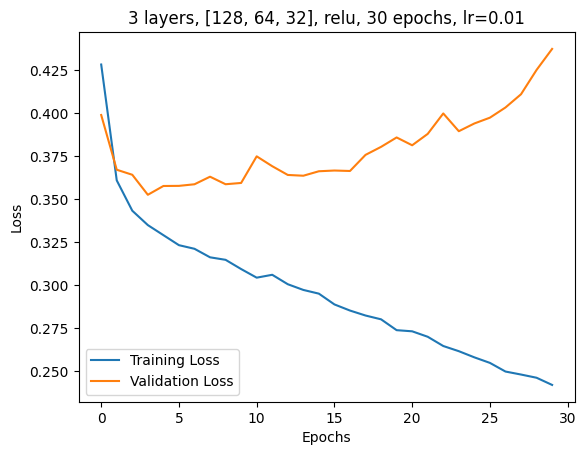

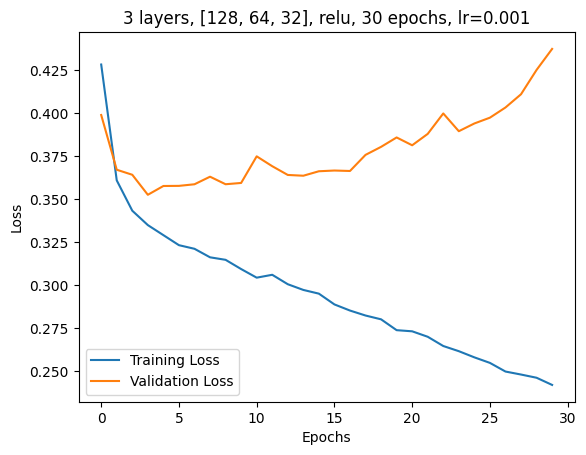

In [50]:
for hidden_layers, units, activation, epochs, lr, accuracy, precision, recall in results:
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{hidden_layers} layers, {units}, {activation}, {epochs} epochs, lr={lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()